In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2023-11-13 22:39:55.374545: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 22:39:55.430490: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 22:39:55.740678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 22:39:55.740761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 22:39:55.742353: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
from keras.datasets import cifar10
(x_train_full, y_train_full), (x_test, y_test)= cifar10.load_data()

In [3]:
x_train_full.shape

(50000, 32, 32, 3)

In [4]:
x_train_full

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train = x_train_full[:40000] / 255
y_train = y_train_full[:40000]
x_valid = x_train_full[40000:] / 255
y_valid = y_train_full[40000:]

In [6]:
x_valid.shape

(10000, 32, 32, 3)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3])
])
for _ in range(20):
    model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal"))


2023-11-13 22:40:03.618015: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [12]:
model.compile(optimizer=keras.optimizers.Nadam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)




### We will use exponential scheduling 

In [9]:
# the formula is lr = lr0 * 0.1**(epoch / s)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [10]:
expo_decay_fn = exponential_decay(lr0=0.01,s=20)
lr_schedular = keras.callbacks.LearningRateScheduler(expo_decay_fn)

In [17]:
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[early_stopping_cb,lr_schedular],epochs=100)

Epoch 1/100
1250/1250 [==============================] - 14s 11ms/step - loss: 2.3521 - accuracy: 0.0974 - val_loss: 2.3411 - val_accuracy: 0.1025 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 2.3484 - accuracy: 0.0988 - val_loss: 2.3324 - val_accuracy: 0.1014 - lr: 0.0089
Epoch 3/100
1250/1250 [==============================] - 13s 11ms/step - loss: 2.3462 - accuracy: 0.0986 - val_loss: 2.3273 - val_accuracy: 0.1003 - lr: 0.0079
Epoch 4/100
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3465 - accuracy: 0.0985 - val_loss: 2.3643 - val_accuracy: 0.1022 - lr: 0.0071
Epoch 5/100
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3433 - accuracy: 0.0984 - val_loss: 2.3321 - val_accuracy: 0.1016 - lr: 0.0063
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3414 - accuracy: 0.0998 - val_loss: 2.3165 - val_accuracy: 0.1016 - lr: 0.0056
Epoch 7/100
1250/1250 [=================

### To plot the learning curve 

In [15]:
import matplotlib.pyplot as plt

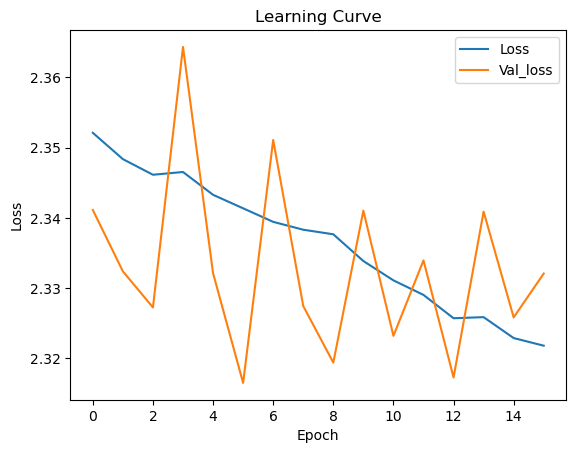

In [18]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Now we will train the model again using batch normalization 

In [19]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3])
])

for _ in range(20):
    model1.add(keras.layers.Dense(100,kernel_initializer="he_normal"))
    model1.add(keras.layers.BatchNormalization())
    model1.add(keras.layers.Activation("elu"))
model1.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal"))


In [20]:
model1.compile(optimizer=keras.optimizers.Nadam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [21]:
history = model1.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[early_stopping_cb,lr_schedular],epochs=100)

Epoch 1/100
1250/1250 [==============================] - 58s 21ms/step - loss: 1.9602 - accuracy: 0.2781 - val_loss: 2.0313 - val_accuracy: 0.2875 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - 24s 19ms/step - loss: 1.7868 - accuracy: 0.3437 - val_loss: 2.4592 - val_accuracy: 0.2698 - lr: 0.0089
Epoch 3/100
1250/1250 [==============================] - 26s 21ms/step - loss: 1.7109 - accuracy: 0.3756 - val_loss: 2.4485 - val_accuracy: 0.2930 - lr: 0.0079
Epoch 4/100
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6490 - accuracy: 0.3988 - val_loss: 2.2939 - val_accuracy: 0.3530 - lr: 0.0071
Epoch 5/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5929 - accuracy: 0.4256 - val_loss: 1.8869 - val_accuracy: 0.3727 - lr: 0.0063
Epoch 6/100
1250/1250 [==============================] - 23s 19ms/step - loss: 1.5434 - accuracy: 0.4437 - val_loss: 1.7703 - val_accuracy: 0.3919 - lr: 0.0056
Epoch 7/100
1250/1250 [=================

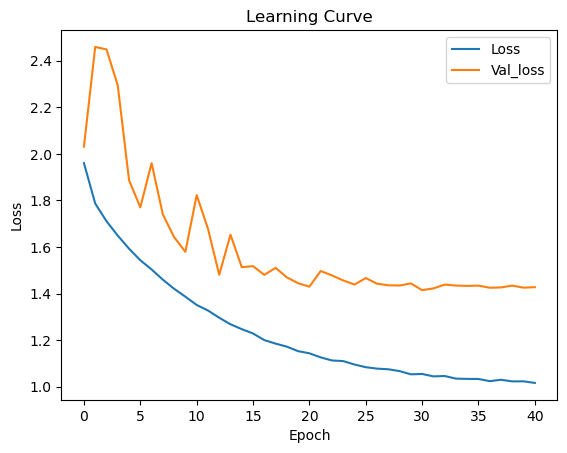

In [22]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Yeah both models are bad (in this type of problems cnns are used), but at least we got better performance when using batch norm

### We can also notice that the loss has converged a lot quicker than before 